In [1]:
import torch

from src.warehouse.environment.warehouse_v1 import Warehouse
from src.warehouse.environment.target_position import TargetPosition
import numpy as np
import time

from src.model import BigDQN
from src.agent import QAgent
import gym
import torch.nn.functional as F
import torch.optim as optimizer

In [2]:
hyperparameters = {
    # training
    'batch_size': 128,
    'learning_rate': 0.001,
    'lr_decay': 5000,
    'lr_end': 0.0001,
    'optimizer': optimizer.Adam,
    'loss': F.smooth_l1_loss,
    # reinforcement & environment
    'eps_end': 0.1,
    'eps_start': 1,
    'eps_decay': 2500,
    'gamma': 0.95,
    'target_update': 20,
    'num_episodes': 100001,
    'memory_capacity': 50000,
    'warmup_episodes': 10,
    'save_freq': 10000,
    'max_steps_per_episode': 100,
    # pytorch
    'np_seed': 100,
    'device': 'cpu',
    'save_model': True,
    'dtype': torch.float32,
    'ylim': (-300, 170),
    'tag': 'warehouse_big_v2'
}

In [3]:
target = TargetPosition.LEFT
num_aisles = 2
rack_height = 5
num_packets = 3
warehouse = Warehouse(num_aisles=num_aisles, rack_height=rack_height,
                      target_pos=target, num_packets=num_packets, seed=hyperparameters['np_seed'])

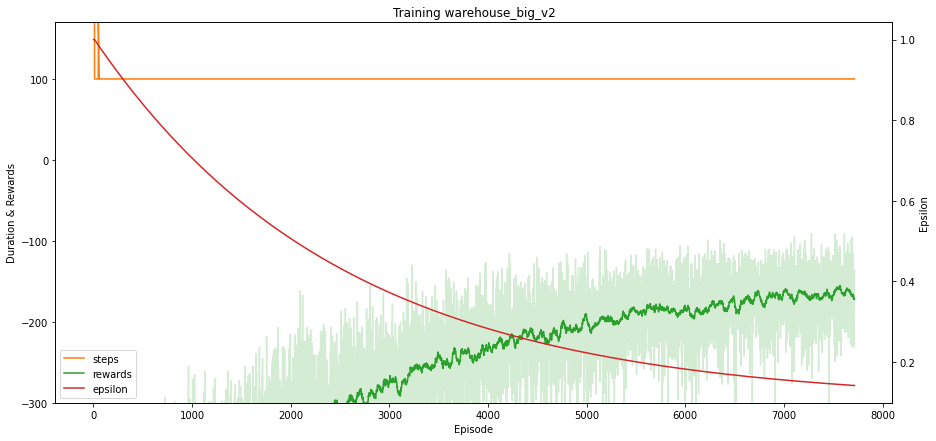

In [ ]:
agent = QAgent(env=warehouse, model=BigDQN, config=hyperparameters)
agent.compile()
agent.fit()

In [ ]:
agent.plot_durations()